# SoccerTrack (MOT) Dataset - EDA

Исследование [датасета](https://drive.google.com/drive/folders/1_o78gcL4j0xHxbRjSR1Evs4VLXCr2ncD)

[SoccerTrack Challenge 2025](https://sites.google.com/g.sp.m.is.nagoya-u.ac.jp/stc2025)

## 1. Setup and Imports

In [4]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from pathlib import Path
from collections import Counter, defaultdict
import seaborn as sns
from PIL import Image
import cv2

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## 2. Load Dataset (117092)

In [96]:
data_dir = Path('/media/viktor/TOSHIBA EXT/DataSets/PATH/TO/sportsmot/annotations') #coco
img_dir = Path('/media/viktor/TOSHIBA EXT/DataSets/PATH/TO/sportsmot/train/117092/img1') #mot 117092
mot_dir = Path('/media/viktor/TOSHIBA EXT/DataSets/PATH/TO/sportsmot') #mot 117092

datasets = {}
split = 'train'
with open(data_dir / 'train.json') as f:
    datasets[split] = json.load(f)
print(f"train: {len(datasets[split]['images'])} images, {len(datasets[split]['annotations'])} annotations")

coco_data = datasets['train']
IMG_WIDTH = coco_data['images'][0]['width']
IMG_HEIGHT = coco_data['images'][0]['height']
print(f"Image size: {IMG_WIDTH}x{IMG_HEIGHT}")

train: 35932 images, 790504 annotations
Image size: 3840x1906


## 3. Dataset Overview

In [6]:
# print(f"Version: {coco_data['info']['version']}") # нет информации
print(f"Categories: {', '.join([cat['name'] for cat in coco_data['categories']])}")

for split, data in datasets.items():
    n_imgs, n_anns = len(data['images']), len(data['annotations'])
    print(f"{split}: {n_imgs:,} images, {n_anns:,} annotations ({n_anns/n_imgs:.1f} per image)")

Categories: unknown
train: 35,932 images, 790,504 annotations (22.0 per image)


#### Данные только тренировочные, нет никакой классификации

## 4. Category Distribution

#### В датасете отсутствует разметка по категориям

## 5. Bounding Box Analysis

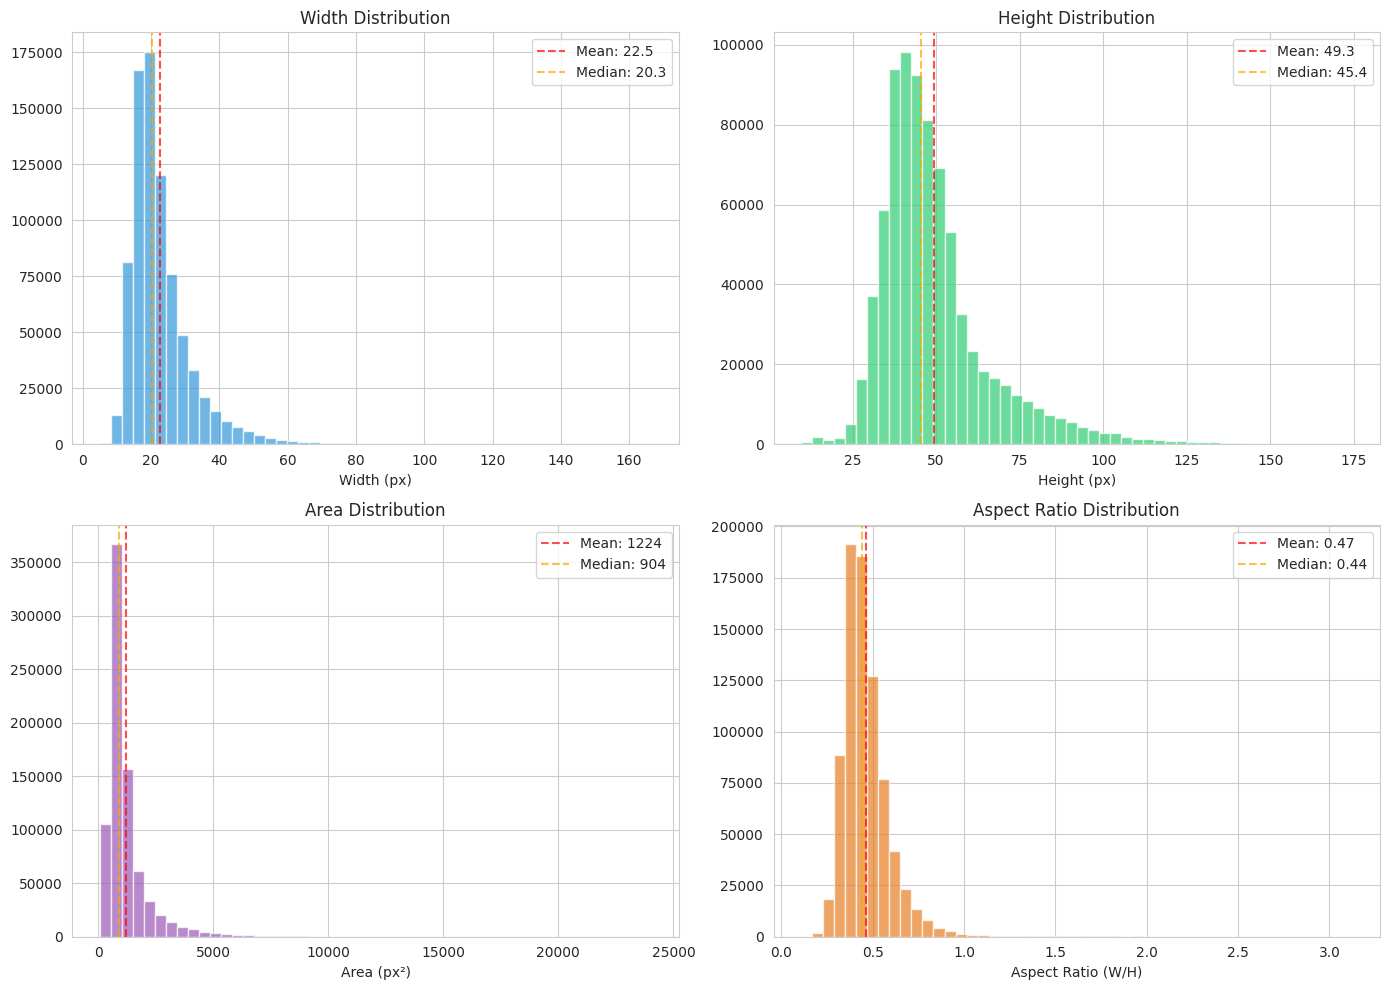

Width: 22.5±9.1 px
Height: 49.3±16.6 px
Area: 1224±1039 px²
Aspect ratio: 0.47±0.14
24033.7148


In [7]:
bbox_widths = []
bbox_heights = []
bbox_areas = []
bbox_aspect_ratios = []

for ann in coco_data['annotations']:
    bbox = ann['bbox']
    w, h = bbox[2], bbox[3]
    bbox_widths.append(w)
    bbox_heights.append(h)
    bbox_areas.append(ann['area'])
    bbox_aspect_ratios.append(w / h if h > 0 else 0)

bbox_widths = np.array(bbox_widths)
bbox_heights = np.array(bbox_heights)
bbox_areas = np.array(bbox_areas)
bbox_aspect_ratios = np.array(bbox_aspect_ratios)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(bbox_widths, bins=50, alpha=0.7, color='#3498db')
axes[0, 0].axvline(np.mean(bbox_widths), color='red', linestyle='--', alpha=0.7, label=f'Mean: {np.mean(bbox_widths):.1f}')
axes[0, 0].axvline(np.median(bbox_widths), color='orange', linestyle='--', alpha=0.7, label=f'Median: {np.median(bbox_widths):.1f}')
axes[0, 0].set_xlabel('Width (px)')
axes[0, 0].set_title('Width Distribution')
axes[0, 0].legend()

axes[0, 1].hist(bbox_heights, bins=50, alpha=0.7, color='#2ecc71')
axes[0, 1].axvline(np.mean(bbox_heights), color='red', linestyle='--', alpha=0.7, label=f'Mean: {np.mean(bbox_heights):.1f}')
axes[0, 1].axvline(np.median(bbox_heights), color='orange', linestyle='--', alpha=0.7, label=f'Median: {np.median(bbox_heights):.1f}')
axes[0, 1].set_xlabel('Height (px)')
axes[0, 1].set_title('Height Distribution')
axes[0, 1].legend()

axes[1, 0].hist(bbox_areas, bins=50, alpha=0.7, color='#9b59b6')
axes[1, 0].axvline(np.mean(bbox_areas), color='red', linestyle='--', alpha=0.7, label=f'Mean: {np.mean(bbox_areas):.0f}')
axes[1, 0].axvline(np.median(bbox_areas), color='orange', linestyle='--', alpha=0.7, label=f'Median: {np.median(bbox_areas):.0f}')
axes[1, 0].set_xlabel('Area (px²)')
axes[1, 0].set_title('Area Distribution')
axes[1, 0].legend()

axes[1, 1].hist(bbox_aspect_ratios, bins=50, alpha=0.7, color='#e67e22')
axes[1, 1].axvline(np.mean(bbox_aspect_ratios), color='red', linestyle='--', alpha=0.7, label=f'Mean: {np.mean(bbox_aspect_ratios):.2f}')
axes[1, 1].axvline(np.median(bbox_aspect_ratios), color='orange', linestyle='--', alpha=0.7, label=f'Median: {np.median(bbox_aspect_ratios):.2f}')
axes[1, 1].set_xlabel('Aspect Ratio (W/H)')
axes[1, 1].set_title('Aspect Ratio Distribution')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print(f"Width: {np.mean(bbox_widths):.1f}±{np.std(bbox_widths):.1f} px")
print(f"Height: {np.mean(bbox_heights):.1f}±{np.std(bbox_heights):.1f} px")
print(f"Area: {np.mean(bbox_areas):.0f}±{np.std(bbox_areas):.0f} px²")
print(f"Aspect ratio: {np.mean(bbox_aspect_ratios):.2f}±{np.std(bbox_aspect_ratios):.2f}")
print(max(bbox_areas))

In [8]:
print(max(bbox_areas)/(3840*1906)*100, '%')

0.32837250240468696 %


#### Ожидаемое соотношение сторон - люди вытянутые прямоугольники 
#### Даже самые большие объекты занимают меньше 0.5% от кадра
#### Std относительно малое, так как камера зафиксирована в одном положении на протяжении всей игры

**Размеры объектов:**
- Ширина и высота примерно в 2+ раза меньше, чем в датасете SoccerNet
- Площадь: 1224±1039 px² (в 4+ раза меньше первого датасета)
- Соотношение сторон: 0.47±0.14 (аналогично SoccerNet)

**Некоторые наблюдения:**

1. **Экстремально мелкие объекты** - средняя площадь всего 1224 px², это менее 0.1% от кадра
3. **Высокая вариативность размеров** - std почти равен mean для площади, что указывает на сильные изменения масштаба (камера статична, но сбоку от поля расположена). Но пики более узкие, чем в гистограммах SoccerNet, так как ракурсы не меняются.


## 5.1. Object Location Analysis (Heatmap)

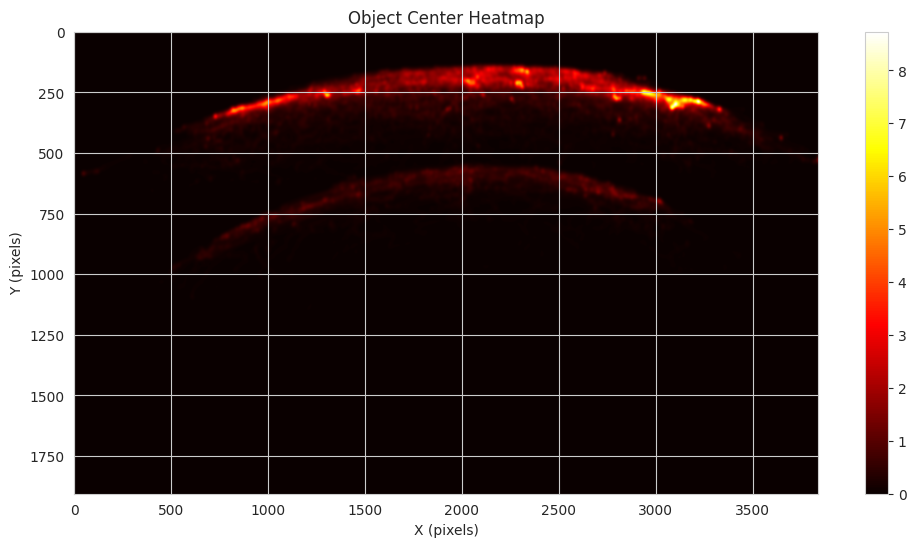

Peak density at y=246 (13% from top)
Top: 99.6%, Bottom: 0.4%


In [18]:
heatmap = np.zeros((IMG_HEIGHT, IMG_WIDTH), dtype=np.float32)

for ann in coco_data['annotations']:
    bbox = ann['bbox']
    cx = int(bbox[0] + bbox[2] / 2)
    cy = int(bbox[1] + bbox[3] / 2)
    cx = np.clip(cx, 0, IMG_WIDTH - 1)
    cy = np.clip(cy, 0, IMG_HEIGHT - 1)
    heatmap[cy, cx] += 1

# for i in range(100):
#     for x in range(30):
#         for y in range(30):
#             heatmap[x+3, y+3] += 1
#             heatmap[x+3, y+4] += 1
#             heatmap[x+4, y+3] += 1
#             heatmap[x+4, y+4] += 1
            
#             heatmap[x+5, y+5] += 1
#             heatmap[x+5, y+6] += 1
#             heatmap[x+6, y+5] += 1
#             heatmap[x+6, y+6] += 1

heatmap_smoothed = cv2.GaussianBlur(heatmap, (51, 51), 0)

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(heatmap_smoothed, cmap='hot', aspect='auto')
ax.set_title('Object Center Heatmap')
ax.set_xlabel('X (pixels)')
ax.set_ylabel('Y (pixels)')
plt.colorbar(im, ax=ax)
# ax.invert_yaxis()
plt.show()

vertical_dist = np.sum(heatmap, axis=1)
peak_y = np.argmax(vertical_dist)
print(f"Peak density at y={peak_y} ({peak_y/IMG_HEIGHT*100:.0f}% from top)")

top_half = np.sum(heatmap[:IMG_HEIGHT//2, :])
bottom_half = np.sum(heatmap[IMG_HEIGHT//2:, :])
print(f"Top: {top_half/(top_half+bottom_half)*100:.1f}%, Bottom: {bottom_half/(top_half+bottom_half)*100:.1f}%")

#### Игроки распределены по дуге и в верхней части изображения из-за эффекта рыбьего глаза. Почти все находятся на узкой кривой   
#### две дуги:
- 1 видео с разрешением 3840 × 1906 (нижняя дуга)
- 5 видео с разрешением 4096 × 1080 (верхняя дуга, имеет примерно ту же форму)

Вероятно кадрируем для 1 и 2 разрешений по отдельности 

Затем можно попробовать коррекцию дисторсии камеры, перспективную трансформацию

## 5.2. Bounding Box to Frame Area Ratio Analysis

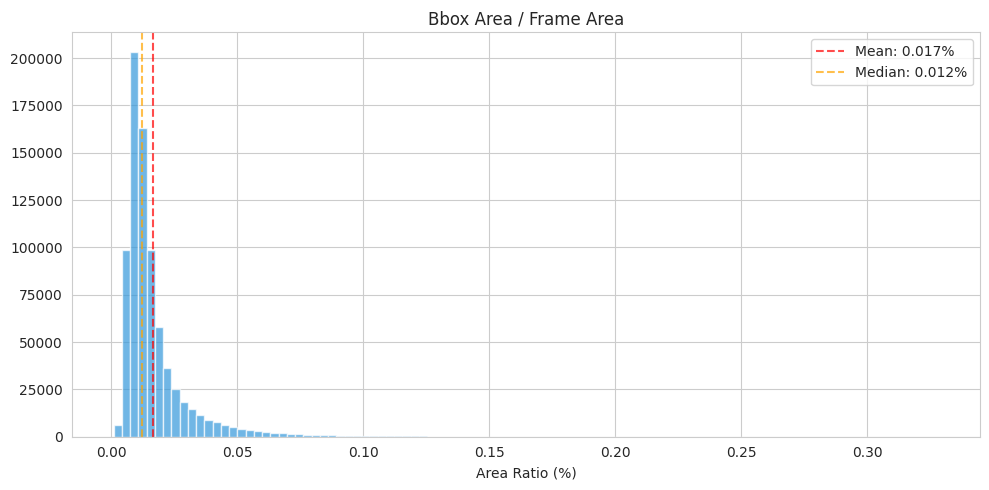

Mean: 0.017%, Median: 0.012%
Range: 0.0010% - 0.328%
Percentiles: 50th=0.012%, 95th=0.044%


In [27]:
frame_area = IMG_WIDTH * IMG_HEIGHT
area_ratios = []
area_ratios_by_category = defaultdict(list)

for ann in coco_data['annotations']:
    ratio = ann['area'] / frame_area * 100
    area_ratios.append(ratio)
    # cat_name = category_names[ann['category_id']]
    # area_ratios_by_category[cat_name].append(ratio)

area_ratios = np.array(area_ratios)

fig, axes = plt.subplots(1, 1, figsize=(10, 5))

axes.hist(area_ratios, bins=100, alpha=0.7, color='#3498db')
axes.axvline(np.mean(area_ratios), color='red', linestyle='--', alpha=0.7, label=f'Mean: {np.mean(area_ratios):.3f}%')
axes.axvline(np.median(area_ratios), color='orange', linestyle='--', alpha=0.7, label=f'Median: {np.median(area_ratios):.3f}%')
axes.set_xlabel('Area Ratio (%)')
axes.set_title('Bbox Area / Frame Area')
axes.legend()

# data = [area_ratios_by_category[cat] for cat in sorted(area_ratios_by_category.keys())]
# axes[1].boxplot(data, labels=[cat.capitalize() for cat in sorted(area_ratios_by_category.keys())])
# axes[1].set_ylabel('Area Ratio (%)')
# axes[1].set_title('Area Ratio by Category')

plt.tight_layout()
plt.show()

print(f"Mean: {np.mean(area_ratios):.3f}%, Median: {np.median(area_ratios):.3f}%")
print(f"Range: {np.min(area_ratios):.4f}% - {np.max(area_ratios):.3f}%")
print(f"Percentiles: 50th={np.percentile(area_ratios, 50):.3f}%, 95th={np.percentile(area_ratios, 95):.3f}%")

#### Игроки СУПЕР маленькие 
#### Категорий нет

## 5.3. Relative Width and Height Analysis

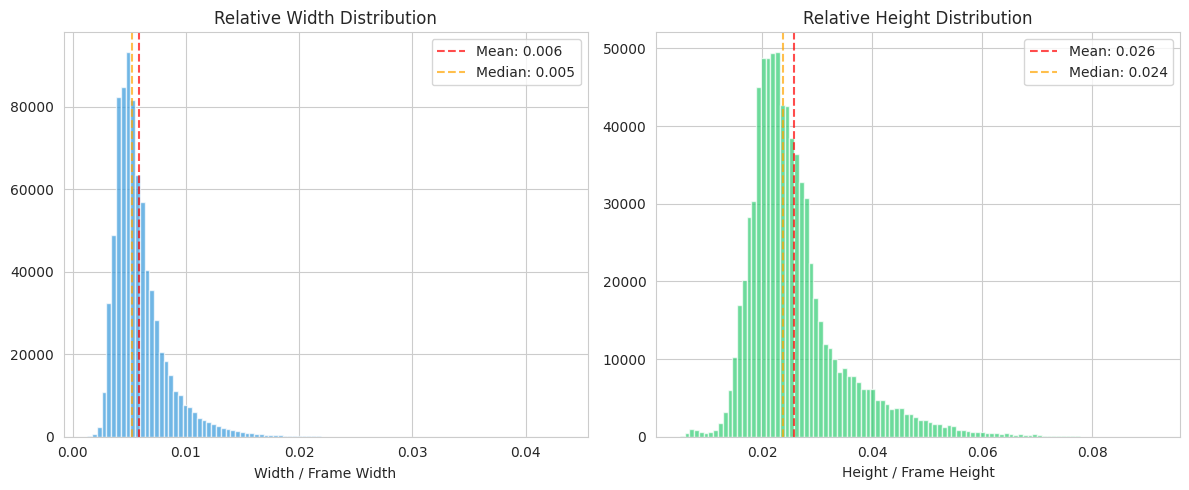

Width:  mean=0.006, median=0.005
Height: mean=0.026, median=0.024


In [28]:
width_ratios = []
height_ratios = []

for ann in coco_data['annotations']:
    bbox = ann['bbox']
    width_ratios.append(bbox[2] / IMG_WIDTH)
    height_ratios.append(bbox[3] / IMG_HEIGHT)

width_ratios = np.array(width_ratios)
height_ratios = np.array(height_ratios)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(width_ratios, bins=100, alpha=0.7, color='#3498db')
axes[0].axvline(np.mean(width_ratios), color='red', linestyle='--', alpha=0.7, label=f'Mean: {np.mean(width_ratios):.3f}')
axes[0].axvline(np.median(width_ratios), color='orange', linestyle='--', alpha=0.7, label=f'Median: {np.median(width_ratios):.3f}')
axes[0].set_xlabel('Width / Frame Width')
axes[0].set_title('Relative Width Distribution')
axes[0].legend()

axes[1].hist(height_ratios, bins=100, alpha=0.7, color='#2ecc71')
axes[1].axvline(np.mean(height_ratios), color='red', linestyle='--', alpha=0.7, label=f'Mean: {np.mean(height_ratios):.3f}')
axes[1].axvline(np.median(height_ratios), color='orange', linestyle='--', alpha=0.7, label=f'Median: {np.median(height_ratios):.3f}')
axes[1].set_xlabel('Height / Frame Height')
axes[1].set_title('Relative Height Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Width:  mean={np.mean(width_ratios):.3f}, median={np.median(width_ratios):.3f}")
print(f"Height: mean={np.mean(height_ratios):.3f}, median={np.median(height_ratios):.3f}")

## 5.4. Bounding Box Overlap Analysis (IoU)

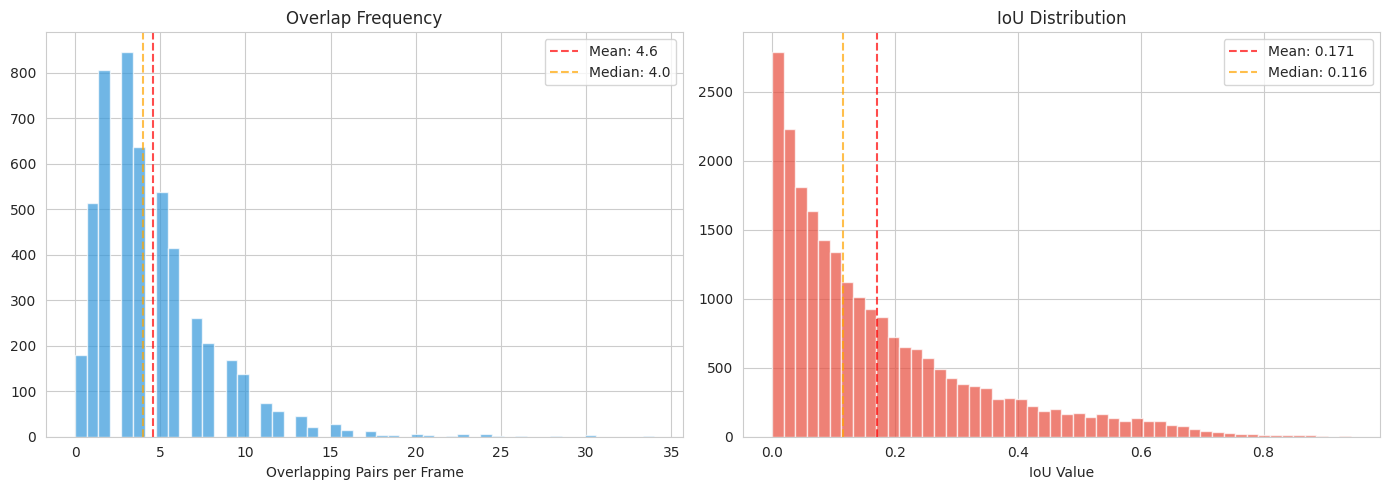

Analyzed 5000 frames, found 22,870 overlaps
Overlaps per frame: mean=4.6, max=34
IoU: mean=0.171, median=0.116
IoU percentiles: 50th=0.116, 75th=0.245, 95th=0.534


In [29]:
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    
    x_left = max(x1, x2)
    y_top = max(y1, y2)
    x_right = min(x1 + w1, x2 + w2)
    y_bottom = min(y1 + h1, y2 + h2)
    
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    
    intersection = (x_right - x_left) * (y_bottom - y_top)
    union = w1 * h1 + w2 * h2 - intersection
    
    return intersection / union if union > 0 else 0.0

ann_index = defaultdict(list)
for ann in coco_data['annotations']:
    ann_index[ann['image_id']].append(ann)

sample_size = min(5000, len(ann_index))
sampled_ids = np.random.choice(list(ann_index.keys()), sample_size, replace=False)

overlaps_per_frame = []
iou_values = []

for img_id in sampled_ids:
    anns = ann_index[img_id]
    if len(anns) < 2:
        overlaps_per_frame.append(0)
        continue
    
    bboxes = [ann['bbox'] for ann in anns]
    frame_overlaps = 0
    
    for i in range(len(bboxes)):
        for j in range(i + 1, len(bboxes)):
            iou = calculate_iou(bboxes[i], bboxes[j])
            if iou > 0:
                frame_overlaps += 1
                iou_values.append(iou)
    
    overlaps_per_frame.append(frame_overlaps)

overlaps_per_frame = np.array(overlaps_per_frame)
iou_values = np.array(iou_values)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(overlaps_per_frame, bins=50, alpha=0.7, color='#3498db')
axes[0].axvline(np.mean(overlaps_per_frame), color='red', linestyle='--', alpha=0.7, label=f'Mean: {np.mean(overlaps_per_frame):.1f}')
axes[0].axvline(np.median(overlaps_per_frame), color='orange', linestyle='--', alpha=0.7, label=f'Median: {np.median(overlaps_per_frame):.1f}')
axes[0].set_xlabel('Overlapping Pairs per Frame')
axes[0].set_title('Overlap Frequency')
axes[0].legend()

if len(iou_values) > 0:
    axes[1].hist(iou_values, bins=50, alpha=0.7, color='#e74c3c')
    axes[1].axvline(np.mean(iou_values), color='red', linestyle='--', alpha=0.7, label=f'Mean: {np.mean(iou_values):.3f}')
    axes[1].axvline(np.median(iou_values), color='orange', linestyle='--', alpha=0.7, label=f'Median: {np.median(iou_values):.3f}')
    axes[1].set_xlabel('IoU Value')
    axes[1].set_title('IoU Distribution')
    axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Analyzed {sample_size} frames, found {len(iou_values):,} overlaps")
print(f"Overlaps per frame: mean={np.mean(overlaps_per_frame):.1f}, max={np.max(overlaps_per_frame)}")
if len(iou_values) > 0:
    print(f"IoU: mean={np.mean(iou_values):.3f}, median={np.median(iou_values):.3f}")
    print(f"IoU percentiles: 50th={np.percentile(iou_values, 50):.3f}, 75th={np.percentile(iou_values, 75):.3f}, 95th={np.percentile(iou_values, 95):.3f}")

#### Здесь распределения очень близки к SoccerNet

## 6. Objects per Image Analysis

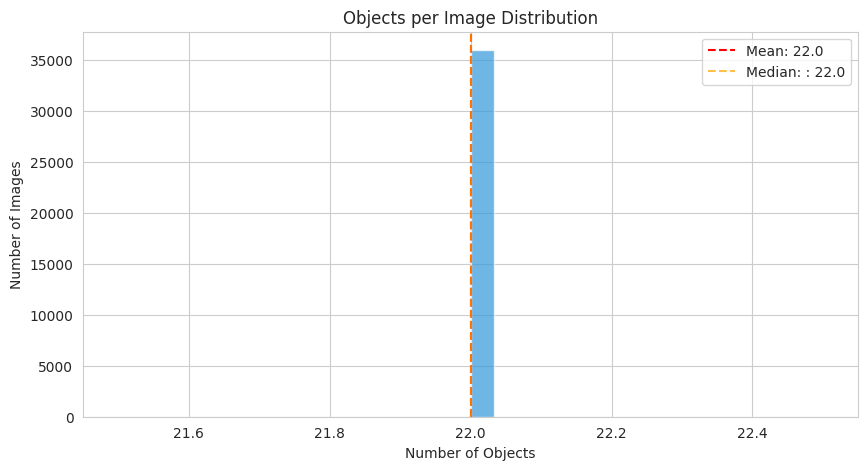

Objects per image: mean=22.0, median=22, max=22


In [30]:
objects_per_image = defaultdict(int)
for ann in coco_data['annotations']:
    objects_per_image[ann['image_id']] += 1

obj_counts = list(objects_per_image.values())

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(obj_counts, bins=30, alpha=0.7, color='#3498db')
ax.axvline(np.mean(obj_counts), color='red', linestyle='--', label=f'Mean: {np.mean(obj_counts):.1f}')
ax.axvline(np.median(obj_counts), color='orange', linestyle='--', alpha=0.7, label=f'Median: : {np.mean(obj_counts):.1f}')
ax.set_xlabel('Number of Objects')
ax.set_ylabel('Number of Images')
ax.set_title('Objects per Image Distribution')
ax.legend()
plt.show()

print(f"Objects per image: mean={np.mean(obj_counts):.1f}, median={np.median(obj_counts):.0f}, max={np.max(obj_counts)}")

#### Все игроки распознаны!

## 7. Visualization Helper Functions


In [90]:
    def visualize_image_with_annotations(image_info, annotations, img_dir):
        img_path = img_dir # / image_info['file_name'].split('/')[2]
        if not img_path.exists():
            print(f"Image not found: {img_path}")
            return
        
        img = np.array(Image.open(img_path))
        fig, ax = plt.subplots(1, figsize=(12, 8))
        ax.imshow(img)
        
        colors = {1: '#3498db', 2: '#2ecc71', 3: '#e74c3c'}
        
        for ann in annotations:
            bbox = ann['bbox']
            cat_id = ann['category_id']
            
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                                    linewidth=2, edgecolor=colors.get(cat_id, 'yellow'), facecolor='none')
            ax.add_patch(rect)
            
            label = f"ID:{ann.get('track_id', '?')}"
            ax.text(bbox[0], bbox[1]-5, label, color='white', fontsize=9,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor=colors.get(cat_id, 'yellow'), alpha=0.8))
        
        ax.axis('off')
        ax.set_title(f"{image_info['file_name']} | {len(annotations)} objects")
        plt.tight_layout()
        plt.show()

## 8. Sample Image Visualization


/media/viktor/TOSHIBA EXT/DataSets/PATH/TO/sportsmot/train/128058/img1/002063.jpg


/tmp/ipykernel_5516/3757390501.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img = np.array(Image.open(img_path))


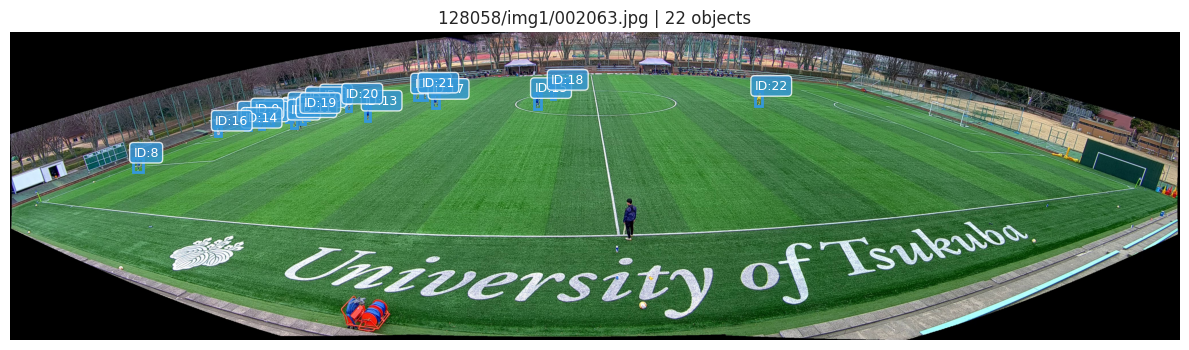

/media/viktor/TOSHIBA EXT/DataSets/PATH/TO/sportsmot/train/118575/img1/002410.jpg


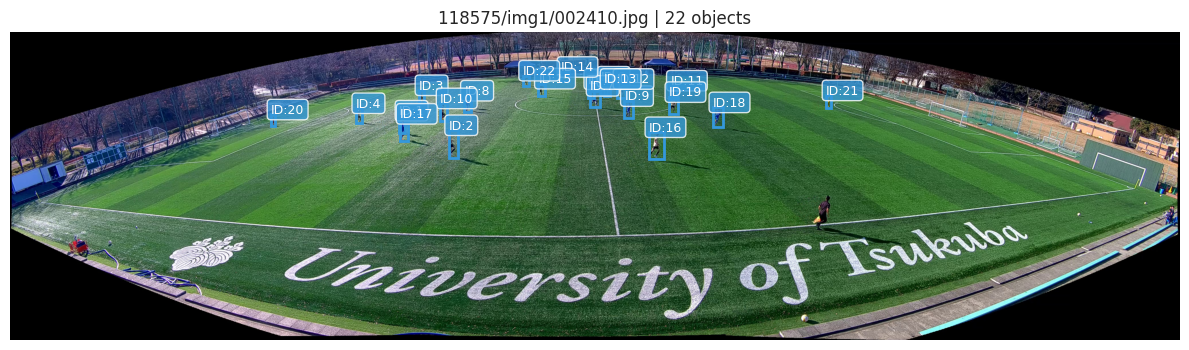

/media/viktor/TOSHIBA EXT/DataSets/PATH/TO/sportsmot/train/118576/img1/001664.jpg


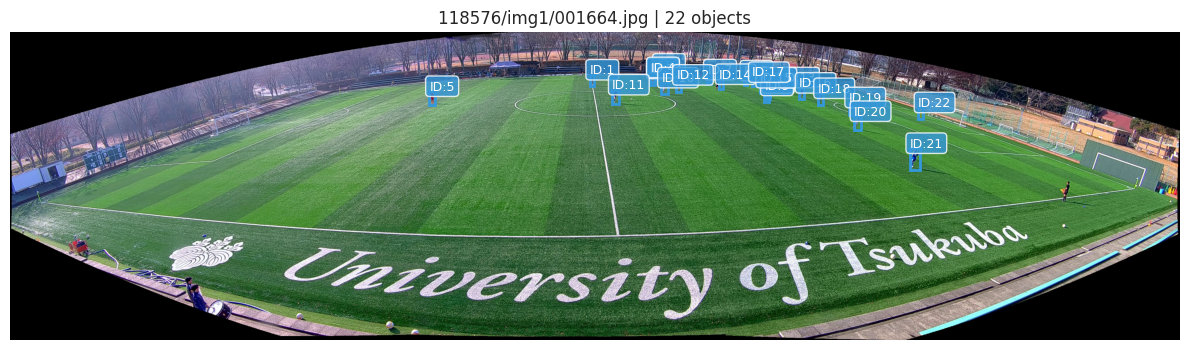

In [92]:
np.random.seed(42)

ann_index = defaultdict(list)
for ann in coco_data['annotations']:
    ann_index[ann['image_id']].append(ann)
    # print(ann['image_id'])

images_with_anns = [img for img in coco_data['images'] if img['id'] in ann_index]
sample_images = np.random.choice(images_with_anns, 3, replace=False)
# print(sample_images)

for img_info in sample_images:
    img_anns = ann_index[img_info['id']]
    # print(img_info['id'])
    # print(img_anns,'\n')
    # print(img_info['file_name'].split('/')[2])
    print(  '/'.join(  str(img_dir).split('/')[:-2:] + img_info['file_name'].split('/')  )  )
    
    # print(str(img_dir).split('/')[:-2:])
    # print(img_info['file_name'].split('/'))
    
    # print(img_dir.split('/'))
    visualize_image_with_annotations(img_info, img_anns, Path('/'.join(  str(img_dir).split('/')[:-2:] + img_info['file_name'].split('/')  )))

## 9.1. Object Motion Analysis

/media/viktor/TOSHIBA EXT/DataSets/PATH/TO/sportsmot/train


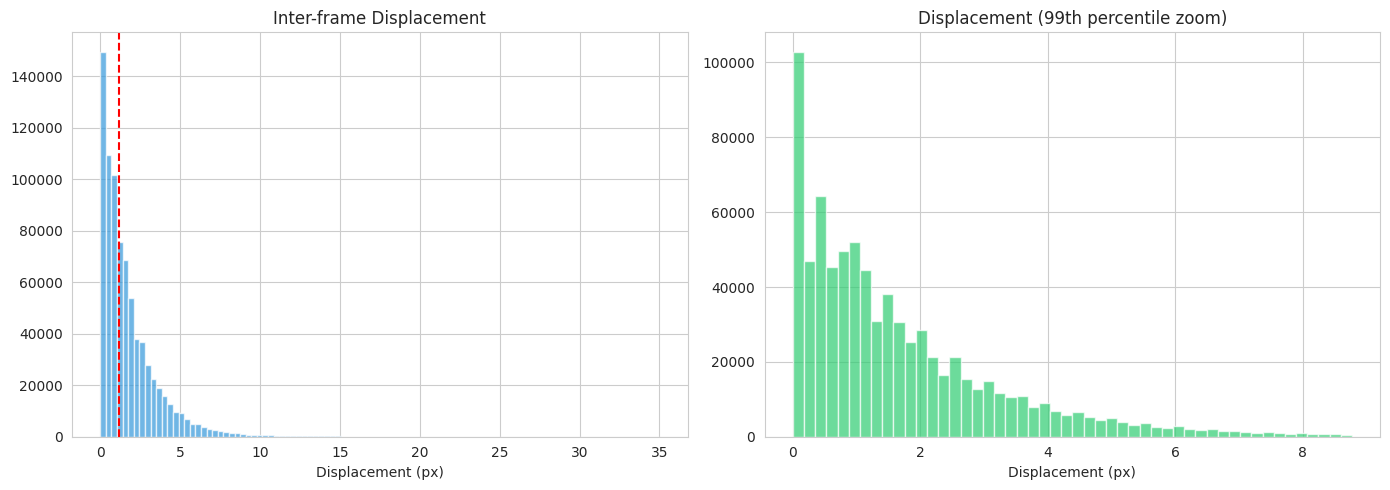

Analyzed 790,372 displacements from 22 tracks
Displacement: mean=1.8px, median=1.2px
Percentiles: 50th=1.2, 95th=5.3, 99th=8.8


In [98]:
motion_split = 'train'
mot_split_dir = mot_dir / motion_split
print(mot_split_dir)

if not mot_split_dir.exists():
    print(f"MOT directory not found: {mot_split_dir}")
    print("Run: python convert_labels.py --format mot")
else:
    all_displacements = []
    track_velocities = defaultdict(list)
    
    sequence_dirs = sorted([d for d in mot_split_dir.iterdir() if d.is_dir()])[:10]
    
    for seq_dir in sequence_dirs:
        gt_file = seq_dir / 'gt' / 'gt.txt'
        if not gt_file.exists():
            continue
        
        mot_data = np.loadtxt(gt_file, delimiter=',')
        tracks = defaultdict(list)
        
        for row in mot_data:
            frame_num, track_id, x, y, w, h = row[:6]
            cx, cy = x + w/2, y + h/2
            tracks[int(track_id)].append((int(frame_num), cx, cy))
        
        for track_id, positions in tracks.items():
            positions = sorted(positions, key=lambda x: x[0])
            for i in range(len(positions) - 1):
                frame1, cx1, cy1 = positions[i]
                frame2, cx2, cy2 = positions[i + 1]
                if frame2 - frame1 == 1:
                    displacement = np.sqrt((cx2-cx1)**2 + (cy2-cy1)**2)
                    all_displacements.append(displacement)
                    track_velocities[track_id].append(displacement)
    
    all_displacements = np.array(all_displacements)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].hist(all_displacements, bins=100, alpha=0.7, color='#3498db')
    axes[0].axvline(np.median(all_displacements), color='red', linestyle='--')
    axes[0].set_xlabel('Displacement (px)')
    axes[0].set_title('Inter-frame Displacement')
    
    reasonable = all_displacements[all_displacements < np.percentile(all_displacements, 99)]
    axes[1].hist(reasonable, bins=50, alpha=0.7, color='#2ecc71')
    axes[1].set_xlabel('Displacement (px)')
    axes[1].set_title('Displacement (99th percentile zoom)')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Analyzed {len(all_displacements):,} displacements from {len(track_velocities)} tracks")
    print(f"Displacement: mean={np.mean(all_displacements):.1f}px, median={np.median(all_displacements):.1f}px")
    print(f"Percentiles: 50th={np.percentile(all_displacements, 50):.1f}, 95th={np.percentile(all_displacements, 95):.1f}, 99th={np.percentile(all_displacements, 99):.1f}")

#### Движение еще более плавное, 1.2 пиксель за фрейм (медиана) при разрешении 4096 × 1080 или 3840 × 1906.

## 9. Tracking ID Analysis

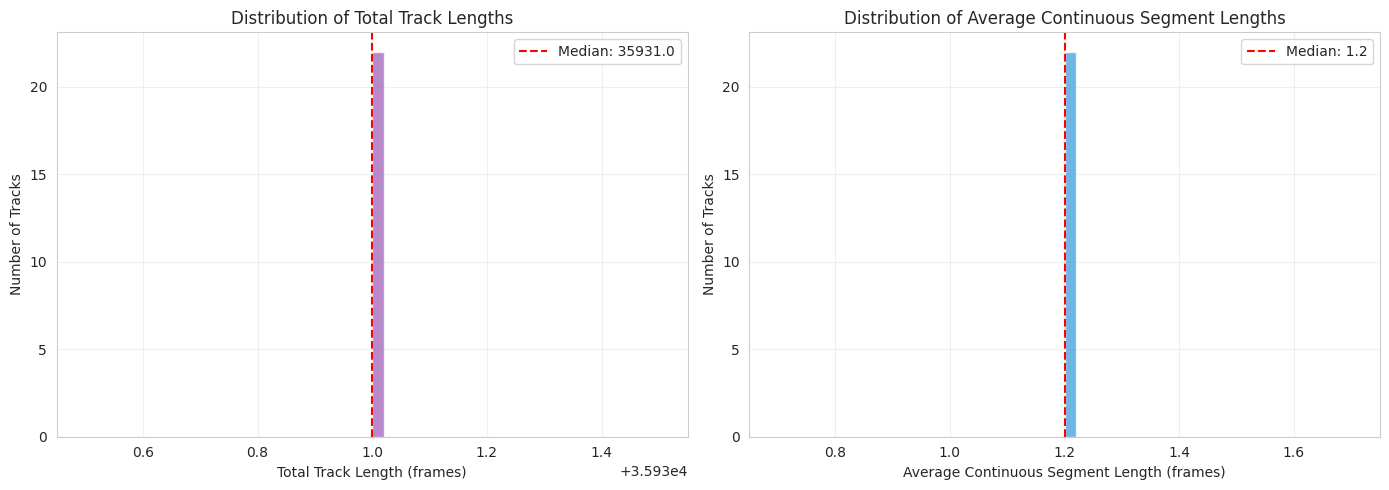

Analyzed 1 videos
Total number of tracks: 22

Total track length:
  Mean: 35931.0 frames
  Median: 35931.0 frames
  Min: 35931, Max: 35931

Average continuous segment length per track:
  Mean: 1.2 frames
  Median: 1.2 frames
  Min: 1.2, Max: 1.2

Overall continuity ratio: 0.0%


In [99]:
# Сопоставляем image_id с video_id
image_to_video = {}
for img in coco_data['images']:
    video_id = img['file_name'].split('/')[1]
    image_to_video[img['id']] = video_id

image_to_frame = {}
for img in coco_data['images']:
    frame_num = int(img['file_name'].split('/')[-1].split('.')[0])
    image_to_frame[img['id']] = frame_num

# Собираем данные по трекам для каждого видео
video_tracks = defaultdict(lambda: defaultdict(list))

for ann in coco_data['annotations']:
    image_id = ann['image_id']
    track_id = ann.get('track_id', -1)
    video_id = image_to_video.get(image_id, 'unknown')
    frame_num = image_to_frame.get(image_id)
    
    if frame_num is not None:
        video_tracks[video_id][track_id].append(frame_num)

all_track_lengths = []  # Общая длина каждого трека
all_avg_continuous_lengths = []  # Средняя длина непрерывных цепочек для каждого трека

for video_id, tracks in video_tracks.items():
    for track_id, frames in tracks.items():
        if track_id == -1:
            continue
            
        # Общая длина трека
        total_length = len(frames)
        all_track_lengths.append(total_length)
        
        # Находим непрерывные цепочки
        frames_sorted = sorted(frames)
        continuous_segments = []
        current_segment_length = 1
        
        for i in range(1, len(frames_sorted)):
            if frames_sorted[i] == frames_sorted[i-1] + 1:
                current_segment_length += 1
            else:
                continuous_segments.append(current_segment_length)
                current_segment_length = 1
        continuous_segments.append(current_segment_length)
        
        # Средняя длина всех непрерывных сегментов для этого трека
        avg_continuous_for_track = np.mean(continuous_segments)
        all_avg_continuous_lengths.append(avg_continuous_for_track)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Общая длина треков
axes[0].hist(all_track_lengths, bins=50, alpha=0.7, color='#9b59b6')
axes[0].axvline(np.median(all_track_lengths), color='red', linestyle='--', label=f'Median: {np.median(all_track_lengths):.1f}')
axes[0].set_xlabel('Total Track Length (frames)')
axes[0].set_ylabel('Number of Tracks')
axes[0].set_title('Distribution of Total Track Lengths')
axes[0].legend()
axes[0].grid(alpha=0.3)

# График 2: Средняя длина непрерывных сегментов
axes[1].hist(all_avg_continuous_lengths, bins=50, alpha=0.7, color='#3498db')
axes[1].axvline(np.median(all_avg_continuous_lengths), color='red', linestyle='--', label=f'Median: {np.median(all_avg_continuous_lengths):.1f}')
axes[1].set_xlabel('Average Continuous Segment Length (frames)')
axes[1].set_ylabel('Number of Tracks')
axes[1].set_title('Distribution of Average Continuous Segment Lengths')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Analyzed {len(video_tracks)} videos")
print(f"Total number of tracks: {len(all_track_lengths)}")
print(f"\nTotal track length:")
print(f"  Mean: {np.mean(all_track_lengths):.1f} frames")
print(f"  Median: {np.median(all_track_lengths):.1f} frames")
print(f"  Min: {np.min(all_track_lengths)}, Max: {np.max(all_track_lengths)}")
print(f"\nAverage continuous segment length per track:")
print(f"  Mean: {np.mean(all_avg_continuous_lengths):.1f} frames")
print(f"  Median: {np.median(all_avg_continuous_lengths):.1f} frames")
print(f"  Min: {np.min(all_avg_continuous_lengths):.1f}, Max: {np.max(all_avg_continuous_lengths):.1f}")
print(f"\nOverall continuity ratio: {np.mean(all_avg_continuous_lengths) / np.mean(all_track_lengths) * 100:.1f}%")

#### Здесь все треки полные, игроки все время в поле зрения камер

## 10. Cross-Split Comparison


KeyError: 'valid'

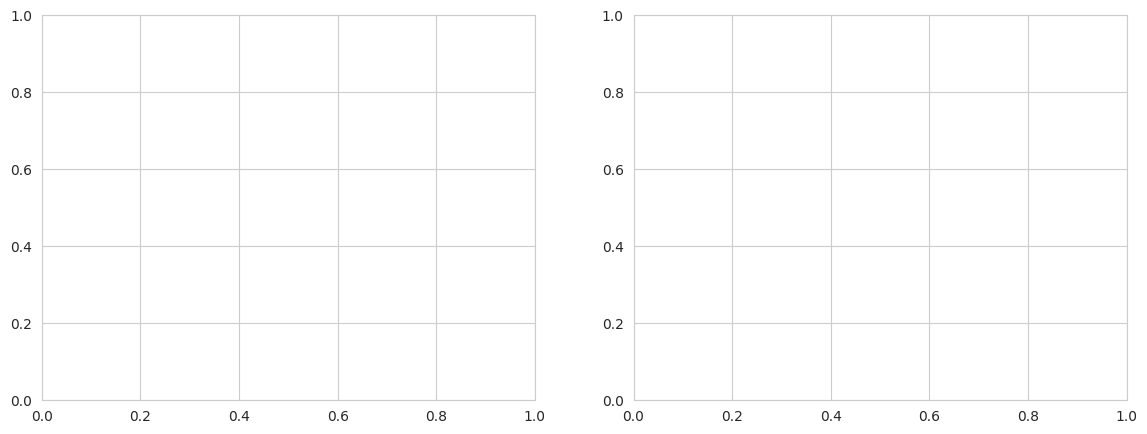

In [100]:
# split_stats = {}

# for split_name, split_data in datasets.items():
#     n_images = len(split_data['images'])
#     n_annotations = len(split_data['annotations'])
#     cat_counts = Counter([ann['category_id'] for ann in split_data['annotations']])
    
#     obj_per_img = defaultdict(int)
#     for ann in split_data['annotations']:
#         obj_per_img[ann['image_id']] += 1
    
#     split_stats[split_name] = {
#         'images': n_images,
#         'annotations': n_annotations,
#         'players': cat_counts.get(1, 0),
#         'goalkeepers': cat_counts.get(2, 0),
#         'referees': cat_counts.get(3, 0),
#         'avg_per_img': np.mean(list(obj_per_img.values()))
#     }

# fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# splits = ['train', 'valid', 'test']

# # Images and annotations
# ax = axes[0]
# x = np.arange(len(splits))
# width = 0.35
# images = [split_stats[s]['images'] for s in splits]
# anns = [split_stats[s]['annotations'] for s in splits]  # scale for visibility
# ax.bar(x - width/2, images, width, label='Images', alpha=0.7)
# ax.bar(x + width/2, anns, width, label='Annotations', alpha=0.7)
# ax.set_xticks(x)
# ax.set_xticklabels(splits)
# ax.set_title('Dataset Split Sizes')
# ax.legend()

# # Category distribution
# ax = axes[1]
# width = 0.25
# players = [split_stats[s]['players'] for s in splits]
# gk = [split_stats[s]['goalkeepers'] for s in splits]
# refs = [split_stats[s]['referees'] for s in splits]
# ax.bar(x - width, players, width, label='Players', color='#3498db', alpha=0.7)
# ax.bar(x, gk, width, label='Goalkeepers', color='#2ecc71', alpha=0.7)
# ax.bar(x + width, refs, width, label='Referees', color='#e74c3c', alpha=0.7)
# ax.set_xticks(x)
# ax.set_xticklabels(splits)
# ax.set_title('Category Distribution')
# ax.legend()

# plt.tight_layout()
# plt.show()

# for split in splits:
#     s = split_stats[split]
#     print(f"{split}: {s['images']:,} imgs, {s['annotations']:,} anns (P:{s['players']:,} GK:{s['goalkeepers']:,} R:{s['referees']:,}), {s['avg_per_img']:.1f} obj/img")

#### Данные размечены только в test, не проводил анализ

## 11. Interactive Visualization (Custom Image)


In [101]:
sample_ids = sorted([img['id'] for img in coco_data['images']])[:10]
print(f"Sample image IDs: {sample_ids}")
print(f"Total images: {len(coco_data['images'])}")

Sample image IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Total images: 35932


{'file_name': '128058/img1/005979.jpg', 'id': 35931, 'frame_id': 5980, 'prev_image_id': 35930, 'next_image_id': 35932, 'video_id': 6, 'height': 1080, 'width': 4096}
Image ID 35931: 128058/img1/005979.jpg (22 annotations)


/tmp/ipykernel_5516/3757390501.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img = np.array(Image.open(img_path))


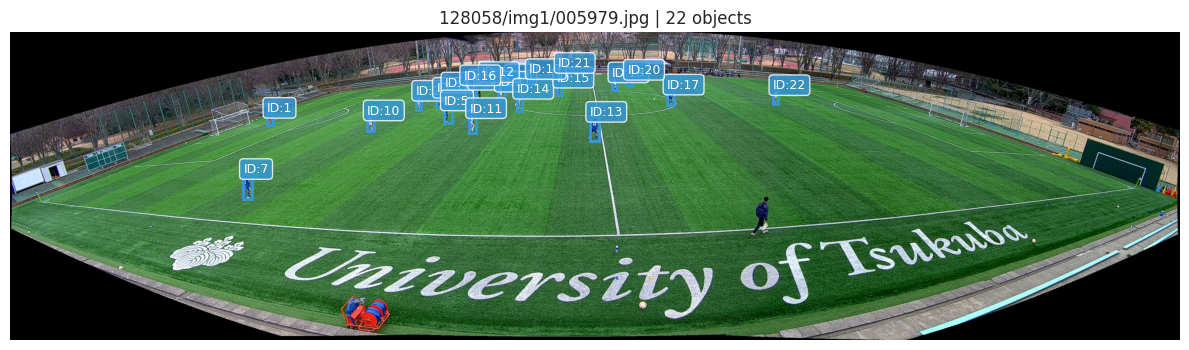

In [124]:
# selected_image_id = 39363
selected_image_id = 35931

# print(len([i['id'] for i in coco_data['images'][:45000]])) # почему-то выводит только 35932 элементов
# print([img for img in coco_data['images'] if img['id'] == selected_image_id])
selected_img = next((img for img in coco_data['images'] if img['id'] == selected_image_id), None)
print(selected_img)
if selected_img:
    if 'ann_index' not in locals():
        ann_index = defaultdict(list)
        for ann in coco_data['annotations']:
            ann_index[ann['image_id']].append(ann)
    
    selected_anns = ann_index.get(selected_image_id, [])

    # print(selected_anns['file_info']['file_name'])
    
    print(f"Image ID {selected_image_id}: {selected_img['file_name']} ({len(selected_anns)} annotations)")
    visualize_image_with_annotations(selected_img, selected_anns, Path('/'.join(  str(img_dir).split('/')[:-2:] + selected_img['file_name'].split('/')  )))
else:
    print(f"Image ID {selected_image_id} not found")


# Path('/'.join(  str(img_dir).split('/')[:-2:] + img_info['file_name'].split('/')  ))
# visualize_image_with_annotations(img_info, img_anns, Path('/'.join(  str(img_dir).split('/')[:-2:] + img_info['file_name'].split('/')  )))